In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
country_l = ['Australia'	, 'Austria'	, 'Belgium'	, 'Brazil'	, 'Bulgaria'	, 'Canada'	, 'Croatia'	, 'Cyprus'	, 'Czech Republic'	, 'Denmark'	, 'Egypt'	, 'Euro area'	, 'Finland'	, 'France'	, 'Germany'	, 'Greece'	, 'Hong Kong'	, 'Hungary'	, 'India'	, 'Indonesia'	, 'Ireland'	, 'Israel'	, 'Italy'	, 'Iceland'	, 'Japan'	, 'Kuwait'	, 'Malaysia'	, 'Mexico'	, 'Netherlands'	, 'New Zealand'	, 'Norway'	, 'Philippines,'	, 'Poland'	, 'Portugal'	, 'Russia'	, 'Saudi Arabia'	, 'Singapore'	, 'Slovakia'	, 'Slovenia'	, 'South Africa'	, 'South KOREA'	, 'Spain'	, 'Sweden'	, 'Switzerland'	, 'Taiwan'	, 'Thailand'	, 'Ukraine'	, 'United Kingdom'
]

In [3]:
cpi = pd.read_csv('cpiAll.csv')

In [4]:
cpi

,Unnamed: 0,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,"Croatia, Rep. of",Cyprus,Czech Rep.,...,"Slovenia, Rep. of",South Africa,"Korea, Rep. of",Spain,Sweden,Switzerland,Taiwan,Thailand,Ukraine,United Kingdom
0,1976Q1,2.98,2.92,2.01,NaN,NaN,1.44,NaN,NaN,NaN,...,NaN,2.09,2.03,4.06,2.85,0.46,NaN,NaN,NaN,3.61
1,1976Q2,2.31,1.75,1.98,NaN,NaN,1.42,NaN,NaN,NaN,...,NaN,3.59,3.35,6.93,2.52,-0.20,NaN,NaN,NaN,3.66
2,1976Q3,2.26,1.36,1.86,NaN,NaN,1.51,NaN,NaN,NaN,...,NaN,2.97,3.74,2.91,1.44,0.40,NaN,NaN,NaN,2.30
3,1976Q4,6.08,1.00,1.65,NaN,NaN,1.38,NaN,NaN,NaN,...,NaN,1.44,-0.11,4.58,2.32,0.40,NaN,NaN,NaN,4.61
4,1977Q1,2.08,2.11,2.00,NaN,NaN,2.10,NaN,NaN,NaN,...,NaN,2.84,3.18,6.49,2.77,0.38,NaN,NaN,NaN,5.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2021Q4,1.34,1.58,2.35,3.22,3.59,1.01,2.15,1.49,1.62,...,1.36,1.05,1.00,3.18,1.45,0.39,2.680000,1.80,2.39,1.88
184,2022Q1,2.14,2.04,3.33,2.58,4.28,2.06,1.83,0.93,6.28,...,1.17,1.51,1.54,2.07,1.62,0.75,2.823333,1.90,4.62,1.26
185,2022Q2,1.78,3.09,1.70,3.04,5.62,3.08,5.75,4.96,5.12,...,4.60,2.34,2.08,3.29,3.28,1.57,3.453333,2.39,9.75,3.67
186,2022Q3,1.82,2.75,2.53,-0.42,3.33,0.84,2.25,1.83,3.56,...,3.17,2.81,1.13,1.18,3.05,0.63,2.923333,1.01,5.08,1.70


In [5]:
cpi.index = cpi['Unnamed: 0']
cpi.drop(columns='Unnamed: 0', inplace=True)
cpi.columns = country_l
# cpi.fillna(0, inplace=True)
# cpi.index = (dt.datetime.strptime(str(i), '%YQ%q') for i in cpi.index)
cpi = cpi.groupby(pd.PeriodIndex(cpi.index, freq='Q'), axis=0).mean()

# !!!!! 由於在某些季度，CPI 季增率會是 0，而造成後續在算 RER 的時候變成 -inf 或 inf，因此如果 CPI 出現 0，統一都改成 0.1
cpi.replace(to_replace=0, value=0.1, inplace=True)
cpi = cpi*0.01

In [6]:
cpi

,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Croatia,Cyprus,Czech Republic,Denmark,...,Slovenia,South Africa,South KOREA,Spain,Sweden,Switzerland,Taiwan,Thailand,Ukraine,United Kingdom
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1976Q1,0.0298,0.0292,0.0201,NaN,NaN,0.0144,NaN,NaN,NaN,0.0311,...,NaN,0.0209,0.0203,0.0406,0.0285,0.0046,NaN,NaN,NaN,0.0361
1976Q2,0.0231,0.0175,0.0198,NaN,NaN,0.0142,NaN,NaN,NaN,0.0401,...,NaN,0.0359,0.0335,0.0693,0.0252,-0.0020,NaN,NaN,NaN,0.0366
1976Q3,0.0226,0.0136,0.0186,NaN,NaN,0.0151,NaN,NaN,NaN,0.0155,...,NaN,0.0297,0.0374,0.0291,0.0144,0.0040,NaN,NaN,NaN,0.0230
1976Q4,0.0608,0.0100,0.0165,NaN,NaN,0.0138,NaN,NaN,NaN,0.0386,...,NaN,0.0144,-0.0011,0.0458,0.0232,0.0040,NaN,NaN,NaN,0.0461
1977Q1,0.0208,0.0211,0.0200,NaN,NaN,0.0210,NaN,NaN,NaN,0.0111,...,NaN,0.0284,0.0318,0.0649,0.0277,0.0038,NaN,NaN,NaN,0.0503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021Q4,0.0134,0.0158,0.0235,0.0322,0.0359,0.0101,0.0215,0.0149,0.0162,0.0110,...,0.0136,0.0105,0.0100,0.0318,0.0145,0.0039,0.026800,0.0180,0.0239,0.0188
2022Q1,0.0214,0.0204,0.0333,0.0258,0.0428,0.0206,0.0183,0.0093,0.0628,0.0209,...,0.0117,0.0151,0.0154,0.0207,0.0162,0.0075,0.028233,0.0190,0.0462,0.0126
2022Q2,0.0178,0.0309,0.0170,0.0304,0.0562,0.0308,0.0575,0.0496,0.0512,0.0330,...,0.0460,0.0234,0.0208,0.0329,0.0328,0.0157,0.034533,0.0239,0.0975,0.0367


In [7]:
usCPI = pd.read_csv('usCPI_q.csv')
usCPI.index = usCPI['Unnamed: 0']
usCPI.drop(columns='Unnamed: 0', inplace=True)
usCPI = usCPI.groupby(pd.PeriodIndex(cpi.index, freq='Q'), axis=0).mean()

# !!!!! 由於在某些季度，CPI 季增率會是 0，而造成後續在算 RER 的時候變成 -inf 或 inf，因此如果 CPI 出現 0，統一都改成 0.1
usCPI.replace(to_replace=0, value=0.1, inplace=True)
usCPI = usCPI*0.01

In [8]:
usCPI

,United States
Unnamed: 0,
1976Q1,0.0636
1976Q2,0.0607
1976Q3,0.0552
1976Q4,0.0507
1977Q1,0.0586
...,...
2021Q4,0.0669
2022Q1,0.0797
2022Q2,0.0864


In [9]:
## get spot data

In [10]:
spotRaw = pd.read_csv('spotRawData0305.csv')
country_l = ['Australia'	, 'Austria'	, 'Belgium'	, 'Brazil'	, 'Bulgaria'	, 'Canada'	, 'Croatia'	, 'Cyprus'	, 'Czech Republic'	, 'Denmark'	, 'Egypt'	, 'Euro area'	, 'Finland'	, 'France'	, 'Germany'	, 'Greece'	, 'Hong Kong'	, 'Hungary'	, 'India'	, 'Indonesia'	, 'Ireland'	, 'Israel'	, 'Italy'	, 'Iceland'	, 'Japan'	, 'Kuwait'	, 'Malaysia'	, 'Mexico'	, 'Netherlands'	, 'New Zealand'	, 'Norway'	, 'Philippines,'	, 'Poland'	, 'Portugal'	, 'Russia'	, 'Saudi Arabia'	, 'Singapore'	, 'Slovakia'	, 'Slovenia'	, 'South Africa'	, 'South KOREA'	, 'Spain'	, 'Sweden'	, 'Switzerland'	, 'Taiwan'	, 'Thailand'	, 'Ukraine'	, 'United Kingdom'
]
newSpot = spotRaw.copy()
dateRange = pd.date_range(start='1975-12-29', end='2022-12-30')
newSpot = pd.DataFrame(index=dateRange)

for i in range(spotRaw.shape[1]):
    if i % 2 == 0:
        tmpDf = spotRaw.iloc[:, i:i+2]
        tmpDf.dropna(inplace=True)
        tmpDf.index = tmpDf.iloc[:, 0]
        tmpDf = tmpDf.iloc[:, 1:2]
        tmpDf.index = (dt.datetime.strptime(str(i), "%Y/%m/%d") for i in tmpDf.index)
        # tmpDf = tmpDf[ tmpDf.index > dt.datetime(2009, 2, 8) ]
        tmpDf = tmpDf.iloc[::-1]
        
        newSpot[tmpDf.columns.values[0]] = tmpDf[tmpDf.columns.values[0]] # merge the data into newSpot

C:\Users\User\AppData\Local\Temp\ipykernel_23192\2509151347.py:1: DtypeWarning: Columns (6,8,12,14,16,20,34,38,46,62,64,68,74,76,92) have mixed types. Specify dtype option on import or set low_memory=False.
  spotRaw = pd.read_csv('spotRawData0305.csv')


In [11]:
newSpot

,Australia_CCY,Austria_CCY,Belgium_CCY,Brazil_CCY,Bulgaria_CCY,Canada_CCY,Croatia_CCY,Cyprus_CCY,Czech Republic_CCY,Denmark_CCY,...,Slovenia_CCY,South Africa_CCY,South KOREA_CCY,Spain_CCY,Sweden_CCY,Switzerland_CCY,Taiwan_CCY,Thailand_CCY,Ukraine_CCY,United Kingdom_CCY
1975-12-29,0.797130,18.4840,39.4100,NaN,NaN,1.0142,NaN,NaN,NaN,6.1690,...,NaN,0.8711,NaN,59.6100,4.3995,2.6254,NaN,NaN,NaN,0.494315
1975-12-30,0.797321,18.4840,39.5300,NaN,NaN,1.0154,NaN,NaN,NaN,6.1576,...,NaN,0.8711,NaN,59.6100,4.3937,2.6226,NaN,NaN,NaN,0.494438
1975-12-31,0.797130,18.5530,39.5300,NaN,NaN,1.0161,NaN,NaN,NaN,6.1690,...,NaN,0.8711,NaN,59.6100,4.3995,2.6226,NaN,NaN,NaN,0.494193
1976-01-01,NaN,NaN,NaN,NaN,NaN,1.0168,NaN,NaN,NaN,6.1690,...,NaN,0.8711,NaN,NaN,4.3956,2.6212,NaN,NaN,NaN,0.494193
1976-01-02,0.797130,18.5190,39.5400,NaN,NaN,1.0168,NaN,NaN,NaN,6.1690,...,NaN,0.8711,NaN,NaN,4.3956,2.6212,NaN,NaN,NaN,0.494193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,1.487874,12.9605,37.9952,5.1612,NaN,1.3599,NaN,0.5513,22.8031,7.0041,...,225.7114,17.0217,1281.19,156.7151,10.5323,0.9332,30.738,34.813,36.9175,0.829669
2022-12-27,1.486547,12.9364,37.9245,5.2192,NaN,1.3582,7.1012,0.5502,22.7571,6.9916,...,225.2912,17.0053,1274.80,156.4234,10.5014,0.9320,30.715,34.712,36.9242,0.829050
2022-12-28,1.485443,12.9330,37.9147,5.2931,1.8421,1.3523,7.0935,0.5501,22.7972,6.9896,...,225.2330,17.2086,1270.93,156.3830,10.4732,0.9290,30.725,34.645,36.9335,0.831601
2022-12-29,1.484340,12.9665,38.0128,5.2634,1.8428,1.3608,7.1022,0.5515,22.8182,7.0072,...,225.8156,17.1146,1267.64,156.7875,10.4780,0.9290,30.771,34.802,36.9170,0.832085


In [12]:
newSpot = newSpot.groupby(pd.PeriodIndex(newSpot.index, freq='Q'), axis=0).mean()

In [13]:
# 為了迎合 CPI，把 1975Q4 刪掉
newSpot = newSpot.iloc[1::]
# newSpot.fillna(0, inplace=True)
newSpot

,Australia_CCY,Austria_CCY,Belgium_CCY,Brazil_CCY,Bulgaria_CCY,Canada_CCY,Croatia_CCY,Cyprus_CCY,Czech Republic_CCY,Denmark_CCY,...,Slovenia_CCY,South Africa_CCY,South KOREA_CCY,Spain_CCY,Sweden_CCY,Switzerland_CCY,Taiwan_CCY,Thailand_CCY,Ukraine_CCY,United Kingdom_CCY
1976Q1,0.797452,18.378339,39.241935,NaN,NaN,0.995940,NaN,NaN,NaN,6.151015,...,NaN,0.871038,NaN,63.610328,4.387114,2.580598,NaN,NaN,NaN,0.500494
1976Q2,0.811079,18.332000,39.260312,NaN,NaN,0.979431,NaN,NaN,NaN,6.079206,...,NaN,0.870568,NaN,67.578594,4.422495,2.496600,NaN,NaN,NaN,0.553603
1976Q3,0.806414,18.017031,39.073281,NaN,NaN,0.977550,NaN,NaN,NaN,6.082841,...,NaN,0.870948,NaN,68.097813,4.413556,2.480152,NaN,NaN,NaN,0.565965
1976Q4,0.867105,17.109403,36.883871,NaN,NaN,0.991870,NaN,NaN,NaN,5.876742,...,NaN,0.870389,NaN,68.268387,4.210897,2.445948,NaN,NaN,NaN,0.604100
1977Q1,0.916014,17.027778,36.740794,NaN,NaN,1.029573,NaN,NaN,NaN,5.892252,...,NaN,0.869758,NaN,68.815556,4.223392,2.520495,NaN,NaN,NaN,0.583720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021Q4,1.372935,12.033480,35.277548,5.584483,1.710561,1.260597,6.574008,NaN,22.192661,6.504267,...,209.566945,15.428071,1183.226212,145.505782,8.859238,0.922005,27.826125,33.374652,26.697579,0.741961
2022Q1,1.381265,12.264106,35.953637,5.238368,1.743117,1.266752,6.723467,NaN,21.976437,6.631791,...,213.583313,15.233195,1205.435000,148.294416,9.344212,0.923680,28.007052,33.044797,28.545121,0.745548
2022Q2,1.399331,12.916534,37.866322,4.919132,1.835929,1.276126,7.077038,0.553253,23.133891,6.983185,...,224.945082,15.562802,1259.388769,156.183077,9.837357,0.964760,29.440475,34.360200,29.591860,0.795578
2022Q3,1.462842,13.658873,40.042555,5.244131,1.941403,1.304850,7.461802,0.580958,24.393158,7.384323,...,237.873580,17.018891,1339.245758,165.159550,10.545402,0.966244,30.369262,36.369894,35.093271,0.849686


In [14]:
# RER (Real Exchange Rate) => Q_t = P_t / (S_t * P_t_star) 
# Pt = US price level, Ptstar = foreign price level, St = spot

In [15]:
rer = pd.DataFrame(index=cpi.index, columns=cpi.columns)

In [16]:
rer

,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Croatia,Cyprus,Czech Republic,Denmark,...,Slovenia,South Africa,South KOREA,Spain,Sweden,Switzerland,Taiwan,Thailand,Ukraine,United Kingdom
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1976Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
rer.loc['1976Q1', 'Australia']

nan

In [18]:
usCPI

,United States
Unnamed: 0,
1976Q1,0.0636
1976Q2,0.0607
1976Q3,0.0552
1976Q4,0.0507
1977Q1,0.0586
...,...
2021Q4,0.0669
2022Q1,0.0797
2022Q2,0.0864


In [19]:
newSpot

,Australia_CCY,Austria_CCY,Belgium_CCY,Brazil_CCY,Bulgaria_CCY,Canada_CCY,Croatia_CCY,Cyprus_CCY,Czech Republic_CCY,Denmark_CCY,...,Slovenia_CCY,South Africa_CCY,South KOREA_CCY,Spain_CCY,Sweden_CCY,Switzerland_CCY,Taiwan_CCY,Thailand_CCY,Ukraine_CCY,United Kingdom_CCY
1976Q1,0.797452,18.378339,39.241935,NaN,NaN,0.995940,NaN,NaN,NaN,6.151015,...,NaN,0.871038,NaN,63.610328,4.387114,2.580598,NaN,NaN,NaN,0.500494
1976Q2,0.811079,18.332000,39.260312,NaN,NaN,0.979431,NaN,NaN,NaN,6.079206,...,NaN,0.870568,NaN,67.578594,4.422495,2.496600,NaN,NaN,NaN,0.553603
1976Q3,0.806414,18.017031,39.073281,NaN,NaN,0.977550,NaN,NaN,NaN,6.082841,...,NaN,0.870948,NaN,68.097813,4.413556,2.480152,NaN,NaN,NaN,0.565965
1976Q4,0.867105,17.109403,36.883871,NaN,NaN,0.991870,NaN,NaN,NaN,5.876742,...,NaN,0.870389,NaN,68.268387,4.210897,2.445948,NaN,NaN,NaN,0.604100
1977Q1,0.916014,17.027778,36.740794,NaN,NaN,1.029573,NaN,NaN,NaN,5.892252,...,NaN,0.869758,NaN,68.815556,4.223392,2.520495,NaN,NaN,NaN,0.583720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021Q4,1.372935,12.033480,35.277548,5.584483,1.710561,1.260597,6.574008,NaN,22.192661,6.504267,...,209.566945,15.428071,1183.226212,145.505782,8.859238,0.922005,27.826125,33.374652,26.697579,0.741961
2022Q1,1.381265,12.264106,35.953637,5.238368,1.743117,1.266752,6.723467,NaN,21.976437,6.631791,...,213.583313,15.233195,1205.435000,148.294416,9.344212,0.923680,28.007052,33.044797,28.545121,0.745548
2022Q2,1.399331,12.916534,37.866322,4.919132,1.835929,1.276126,7.077038,0.553253,23.133891,6.983185,...,224.945082,15.562802,1259.388769,156.183077,9.837357,0.964760,29.440475,34.360200,29.591860,0.795578
2022Q3,1.462842,13.658873,40.042555,5.244131,1.941403,1.304850,7.461802,0.580958,24.393158,7.384323,...,237.873580,17.018891,1339.245758,165.159550,10.545402,0.966244,30.369262,36.369894,35.093271,0.849686


In [20]:
# check if two sereis' index are the same
usCPI['United States'].equals(newSpot['Australia_CCY'])

False

In [21]:
cpi['Australia'].equals(newSpot['Australia_CCY'])

False

In [22]:
try:
    for i in rer.columns:
        # rer[i] = np.log(usCPI['United States'] / newSpot[f'{i}_CCY'] / cpi[i])
        rer[i] = usCPI['United States'] / newSpot[f'{i}_CCY'] / cpi[i]
except Exception as e:
    print('here')
    pass

In [23]:
newSpot.loc['1991Q1', 'Mexico_CCY']

0.337631856953125

In [24]:
er = pd.read_csv('er.csv')
er.index = er['Unnamed: 0']
er.drop(columns='Unnamed: 0', inplace=True)
er = er.groupby(pd.PeriodIndex(er.index, freq='Q'), axis=0).mean()

# also drop 1975Q4
er = er.iloc[1::]

In [25]:
er

,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Croatia,Cyprus,Czech Republic,Denmark,...,Slovenia,South Africa,South KOREA,Spain,Sweden,Switzerland,Taiwan,Thailand,Ukraine,United Kingdom
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1976Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021Q4,-0.004533,-0.027210,-0.027213,-0.030727,-0.034089,0.001299,-0.031922,NaN,-0.028399,-0.027367,...,-0.027212,-0.057324,-0.009165,-0.027211,-0.029462,0.011201,0.000241,0.007291,-0.026211,-0.008141
2022Q1,0.015366,-0.006461,-0.006458,0.087709,-0.006775,0.007624,-0.009308,NaN,0.013123,-0.006656,...,-0.006459,0.057444,-0.010809,-0.006459,-0.019856,-0.005190,NaN,0.005391,-0.054123,-0.006885
2022Q2,-0.042547,-0.035485,-0.035490,0.011743,-0.035116,-0.013716,-0.031076,NaN,-0.041998,-0.035974,...,-0.035489,-0.063776,-0.023731,-0.035489,-0.053151,-0.037305,-0.014104,-0.021839,0.004688,-0.037435


In [26]:
rer

,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Croatia,Cyprus,Czech Republic,Denmark,...,Slovenia,South Africa,South KOREA,Spain,Sweden,Switzerland,Taiwan,Thailand,Ukraine,United Kingdom
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1976Q1,2.676310,0.118514,0.080633,NaN,NaN,4.434671,NaN,NaN,NaN,0.332468,...,NaN,3.493603,NaN,0.024627,0.508667,5.357706,NaN,NaN,NaN,3.520065
1976Q2,3.239767,0.189209,0.078085,NaN,NaN,4.364421,NaN,NaN,NaN,0.248999,...,NaN,1.942190,NaN,0.012961,0.544654,-12.156533,NaN,NaN,NaN,2.995773
1976Q3,3.028814,0.225277,0.075953,NaN,NaN,3.739583,NaN,NaN,NaN,0.585465,...,NaN,2.133979,NaN,0.027856,0.868536,5.564176,NaN,NaN,NaN,4.240544
1976Q4,0.961684,0.296328,0.083308,NaN,NaN,3.704028,NaN,NaN,NaN,0.223503,...,NaN,4.045124,NaN,0.016215,0.518974,5.182039,NaN,NaN,NaN,1.820532
1977Q1,3.075616,0.163101,0.079748,NaN,NaN,2.710323,NaN,NaN,NaN,0.895970,...,NaN,2.372362,NaN,0.013121,0.500906,6.118263,NaN,NaN,NaN,1.995839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021Q4,3.636396,0.351866,0.080697,0.372038,1.089415,5.254465,0.473323,NaN,0.186081,0.935051,...,0.023473,0.412976,0.005654,0.014458,0.520789,18.604947,0.089710,0.111362,0.104847,4.796086
2022Q1,2.696295,0.318561,0.066569,0.589716,1.068287,3.054215,0.647760,NaN,0.057749,0.575018,...,0.031894,0.346490,0.004293,0.025963,0.526503,11.504710,0.100793,0.126941,0.060434,8.484230
2022Q2,3.468753,0.216476,0.134218,0.577766,0.837378,2.198211,0.212322,3.148535,0.072945,0.374927,...,0.008350,0.237252,0.003298,0.016814,0.267770,5.704201,0.084983,0.105211,0.029946,2.959135


In [27]:
# about rank() fcn: https://zhuanlan.zhihu.com/p/87593543
# weight = z(rank(C)-((N+1)/2) )
rank = pd.DataFrame(index=rer.index, columns=rer.columns)
for i in rer.index:
    rank.loc[i, :] = rer.loc[i, :].rank(method='max', na_option='keep', ascending=False)

In [28]:
rank

,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Croatia,Cyprus,Czech Republic,Denmark,...,Slovenia,South Africa,South KOREA,Spain,Sweden,Switzerland,Taiwan,Thailand,Ukraine,United Kingdom
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1976Q1,5.0,14.0,15.0,NaN,NaN,2.0,NaN,NaN,NaN,13.0,...,NaN,4.0,NaN,16.0,10.0,1.0,NaN,NaN,NaN,3.0
1976Q2,2.0,13.0,14.0,NaN,NaN,1.0,NaN,NaN,NaN,12.0,...,NaN,5.0,NaN,16.0,10.0,20.0,NaN,NaN,NaN,3.0
1976Q3,5.0,14.0,16.0,NaN,NaN,4.0,NaN,NaN,NaN,10.0,...,NaN,7.0,NaN,17.0,9.0,2.0,NaN,NaN,NaN,3.0
1976Q4,8.0,13.0,16.0,NaN,NaN,3.0,NaN,NaN,NaN,15.0,...,NaN,2.0,NaN,17.0,10.0,1.0,NaN,NaN,NaN,5.0
1977Q1,2.0,15.0,16.0,NaN,NaN,3.0,NaN,NaN,NaN,9.0,...,NaN,5.0,NaN,17.0,12.0,1.0,NaN,NaN,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021Q4,8.0,27.0,36.0,26.0,17.0,6.0,24.0,NaN,29.0,19.0,...,41.0,25.0,45.0,42.0,23.0,2.0,35.0,33.0,34.0,7.0
2022Q1,10.0,28.0,35.0,22.0,18.0,8.0,21.0,NaN,37.0,23.0,...,38.0,27.0,45.0,41.0,24.0,3.0,32.0,30.0,36.0,4.0
2022Q2,5.0,27.0,29.0,21.0,18.0,11.0,28.0,8.0,34.0,23.0,...,42.0,26.0,45.0,40.0,25.0,4.0,32.0,30.0,38.0,9.0


In [29]:
import math
# count for each period's portfolio currency number
n = pd.Series()
for i in rank.index:
    count = 0
    s = rank.loc[i] # convert to a series
    for j in s:
        if math.isnan(j) != True:
            count += 1
    n[i] = count

C:\Users\User\AppData\Local\Temp\ipykernel_23192\2614881085.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  n = pd.Series()


In [30]:
n = (n+1)/2

In [31]:
n

1976Q1    10.5
1976Q2    10.5
1976Q3    10.5
1976Q4    10.5
1977Q1    10.5
          ... 
2021Q4    24.0
2022Q1    24.0
2022Q2    24.0
2022Q3    24.0
2022Q4    22.0
Freq: Q-DEC, Length: 188, dtype: float64

In [32]:
(rank.loc['2022Q4']-n['2022Q4']).sum()

0.0

In [33]:
for i in rank.index:
    rank.loc[i] = rank.loc[i]-n[i]

In [34]:
for i in rank.index:
    zt = 0
    posSum = 0
    for j in rank.columns:

        countryRank = rank.loc[i, j]
        if  countryRank > 0:
            posSum += countryRank
    if posSum != 0:
        zt = 1/posSum
    else: # posSum = 0
        pass
    rank.loc[i, 'Z_t'] = zt

## Get Weight

In [35]:
rank.loc[i].iloc[0:19]*s.iloc[-1]

Australia         198.0
Austria           -72.0
Belgium          -144.0
Brazil            144.0
Bulgaria          108.0
Canada            360.0
Croatia           -54.0
Cyprus              NaN
Czech Republic    270.0
Denmark            72.0
Egypt            -162.0
Euro area          54.0
Finland            18.0
France             90.0
Germany           162.0
Greece           -180.0
Hong Kong         126.0
Hungary          -306.0
India               NaN
Name: 2022Q4, dtype: object

In [36]:
weights = pd.DataFrame(index=rank.index, columns=country_l)
for i in weights.index:
    s = rank.loc[i]
    if s.iloc[-1] != 0: # if zt is not equal to 0
        weights.loc[i, :] = s.iloc[0:19]*s.iloc[-1]

In [37]:
weights.loc['2021Q4', :].sum()

-0.04710144927536235

In [38]:
valuePortRet = er * weights

In [39]:
valuePortRet['Port_Ret'] = valuePortRet.sum(axis=1)

In [40]:
valuePortRet['Cum_ret'] = (1 + valuePortRet['Port_Ret']).cumprod() - 1

<AxesSubplot:xlabel='Unnamed: 0'>

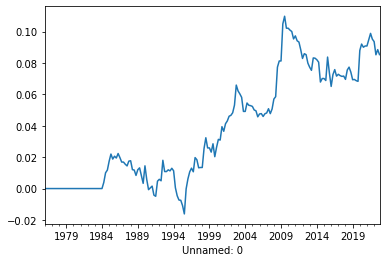

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
valuePortRet['Cum_ret'].plot()
# ax.set_xlim([dt.date(1989, 1, 1), dt.date(2022, 11, 30)]) 

In [42]:
allret = pd.DataFrame()
allret['Ret'] = valuePortRet['Port_Ret']
allret['Cum_Ret'] = (1 + allret['Ret']).cumprod() - 1
allret.index.name = ''

In [43]:
allret['Dollar Investing'] = 1
allret.loc[allret.index[0], 'Dollar Investing'] = 1

tmp = 0
for i in allret.index:
    if tmp == 0:
        tmp += 1
        pass
    else:
        next = allret.loc[i, 'Dollar Investing']
        update = allret.loc[allret.index[tmp-1], 'Dollar Investing']
        next = update*(1+allret.loc[allret.index[tmp-1], 'Ret'])
        allret.loc[i, 'Dollar Investing'] = next
        tmp += 1

In [44]:
allret.index[15]

Period('1979Q4', 'Q-DEC')

In [59]:
allret.index[162]

Timestamp('2016-07-01 00:00:00', freq='QS-OCT')

In [65]:
allret.index[153]

Timestamp('2014-04-01 00:00:00', freq='QS-OCT')

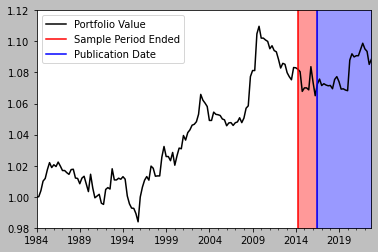

In [76]:
plt.style.use('grayscale')


fig, ax = plt.subplots()
allret['Dollar Investing'].plot(label='Portfolio Value')

ax.set_ylim([0.98, 1.12])  
ax.set_xlim([dt.date(1984, 1, 1), dt.date(2022, 11, 30)])  
plt.axvline(x = allret.index[153], color = 'r', label = 'Sample Period Ended')
plt.axvline(x = allret.index[162], color = 'b', label = 'Publication Date')
plt.legend(loc='best')

postSam = '2014-03-31'
postPub = '2016-6-30'
ax.fill_between(allret.index, 0.98, 1.12, where= (allret.index >= '2014-1-31') & (allret.index <= allret.index[162]),  color='red', alpha=0.4)
ax.fill_between(allret.index, 0.98, 1.12, where= allret.index >= allret.index[162],  color='blue', alpha=0.4)

plt.savefig('writing/pics/valueCum(0330).png', dpi=300)
plt.show()
plt.close()

In [46]:
allret.index= pd.PeriodIndex(allret.index, freq='Q').to_timestamp()

In [47]:
allret

,Ret,Cum_Ret,Dollar Investing
,,,
1976-01-01,0.000000,0.000000,1.000000
1976-04-01,0.000000,0.000000,1.000000
1976-07-01,0.000000,0.000000,1.000000
1976-10-01,0.000000,0.000000,1.000000
1977-01-01,0.000000,0.000000,1.000000
...,...,...,...
2021-10-01,-0.003320,0.095186,1.098834
2022-01-01,-0.001462,0.093584,1.095186
2022-04-01,-0.007662,0.085205,1.093584


In [48]:
allret['beta1'] = 0
allret['beta2'] = 0
for i in allret.index:
    if (i < dt.datetime(2014, 3, 31) ):
        allret.loc[i, 'beta1'] = 0
    elif (i > dt.datetime(2014, 3, 31) ) and (i < dt.datetime(2016, 6, 30) ):
        allret.loc[i, 'beta1'] = 1
    elif i > dt.datetime(2016, 6, 30):
        allret.loc[i, 'beta2'] = 1
    else:
        allret.loc[i, 'beta2'] = 0

In [49]:
import statsmodels.formula.api as smf

In [50]:
reg_exp = 'Ret ~ beta1+beta2'
nw_ols1 = smf.ols(formula=reg_exp, data=allret).fit(cov_type='HAC', cov_kwds={'maxlags':1}, use_t=True)
nw_ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Ret   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.2225
Date:                Thu, 30 Mar 2023   Prob (F-statistic):              0.801
Time:                        22:50:59   Log-Likelihood:                 734.34
No. Observations:                 188   AIC:                            -1463.
Df Residuals:                     185   BIC:                            -1453.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.000      1.372      0.172      -0.000       0.001
beta1         -0.0015      0.002     -0.667      0.506      -0.006       0.003
beta2      -6.175e-05      0.001     -0.061      0.951      -0.002       0.002
==============================================================================
Omnibus:                       57.463   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.503
Skew:                           1.291   Prob(JB):                     2.82e-34
Kurtosis:                       6.614   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [51]:
nw_ols1.pvalues

Intercept    0.171619
beta1        0.505529
beta2        0.951077
dtype: float64